# Подготовительные работы

In [3]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [6]:
log_space=np.logspace(-6,6,13,endpoint=True)

In [5]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

# Непосредственно сам процесс построения модели

(206,)


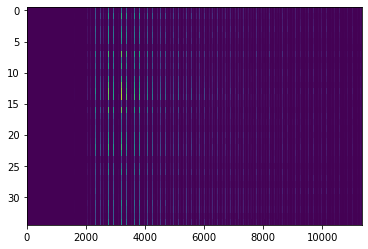


(25, 11330)
(25, 3)
Gominy    17.146927
Tyr        0.673018
Trp        0.260799
dtype: float64
{'copy': True, 'max_iter': 10000, 'n_components': 5, 'scale': True, 'tol': 10.0}
Правильность на тестовом наборе: 0.65
Wall time: 38min 28s


In [7]:
%%time
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata, test_size=0.2856 
)
print(X_train.shape)
print(y_train.shape)

#начинаем применять
pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,85), 
    'scale': [True, False], 
    'tol': log_space
}
gridCought=GridSearchCV(pls2, parametrsNames, cv=5,return_train_score=True)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)
s=np.mean((predictors-y_test)**2)

print(s)
print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



In [44]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: 0.52


In [45]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.53


# Обрабатываем результаты

In [9]:
cvres  = gridCought.cv_results_

#### Попробуем сохранить в пикль результаты, что бы завтра не пересчитывать

In [29]:
pkl.dump(cvres,open('C:/Users/admin/Desktop/88/PLS2.pkl.gz', 'wb'))

In [10]:
filew=dict()

In [11]:
for mean_score,  params  in zip(cvres [ "mean_test_score" ], 
                                cvres [ "params" ]
                                ): 
    filew[mean_score]=params
    print (mean_score , params) 

0.31851935705069623 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
0.31958781599317787 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-05}
0.3215383110549462 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.0001}
0.3294290665579369 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.001}
0.35589039389943544 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.01}
0.37671690921471707 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.1}
0.38760490282588955 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1.0}
0.4339746753509637 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 10.0}
0.4339746753509637 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 100.0}
0.4339746753509637 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol

0.4611175873491351 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 0.1}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 1.0}
0.46111758734913755 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 10.0}
0.46111758734913755 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 100.0}
0.46111758734913755 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 1000.0}
0.46111758734913755 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 10000.0}
0.46111758734913755 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 100000.0}
0.46111758734913755 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': True, 'tol': 1000000.0}
0.04223924462432148 {'copy': True, 'max_iter': 10000, 'n_components': 28, 'scale': False, 'tol': 1e-06}
0.04223924462433143 {'copy': True, 'max_iter': 10000, 'n_components'

0.4611175873491362 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': True, 'tol': 10000.0}
0.4611175873491362 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': True, 'tol': 100000.0}
0.4611175873491362 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': True, 'tol': 1000000.0}
0.0422392446243348 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': False, 'tol': 1e-06}
0.04223924462432386 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': False, 'tol': 1e-05}
0.04223924462433178 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': False, 'tol': 0.0001}
0.04223924462433228 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': False, 'tol': 0.001}
0.0422392446243337 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': False, 'tol': 0.01}
0.042239244624328404 {'copy': True, 'max_iter': 10000, 'n_components': 47, 'scale': False, 'tol': 0.1}
0.04223924462432518 {'copy': True, 'max_iter': 10000, 'n_compone

0.46111758734913655 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 1.0}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 10.0}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 100.0}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 1000.0}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 10000.0}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 100000.0}
0.46111758734913566 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': True, 'tol': 1000000.0}
0.04223924462432716 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': False, 'tol': 1e-06}
0.042239244624331033 {'copy': True, 'max_iter': 10000, 'n_components': 76, 'scale': False, 'tol': 1e-05}
0.04223924462432756 {'copy': True, 'max_iter': 10000, 'n_compon

In [12]:
ylow=gridCought.cv_results_[ "mean_test_score" ]

In [13]:
xlow=parametrsNames[ "n_components" ]

### Получаем ошибки

### Строим метки оси ох

In [22]:
xx=np.arange(-500,2500,500)

In [23]:
xlab=[]

In [24]:
for i in xx:
    xlab+=[cvres[ "params" ][i]['n_components']]

### Строим метки оси оу 

In [26]:
yy=np.array([-0.2,0.0,0.2,0.4,0.6,0.8,1.0])

# График нового образца

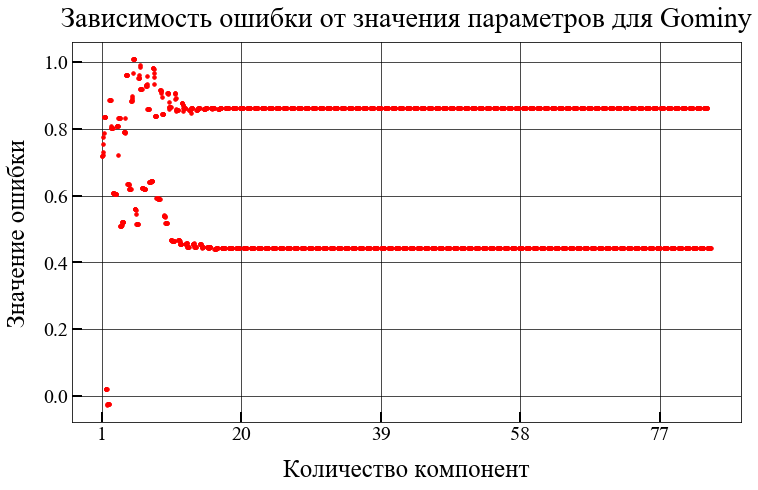

In [28]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(ylow,".",color="red",ms=7)
axs.set_ylabel("Значение ошибки" , fontsize=25,labelpad=12)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость ошибки от значения параметров для Gominy", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('Зависимость ошибки от параметров для PLS1_Gominy.png', format='png', dpi=100)
plt.show();

# Графики старым методом построенные

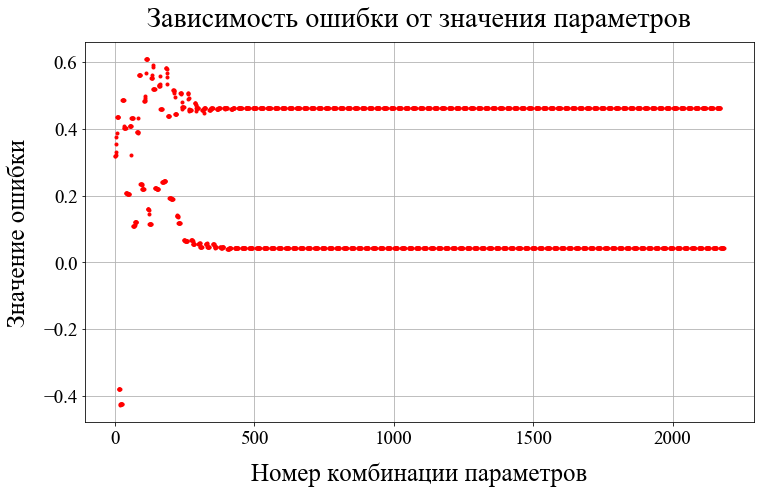

In [15]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,7))
plt.plot(ylow,".",color="red")
plt.ylabel("Значение ошибки" , fontsize=25,labelpad=12)
plt.grid()
plt.xlabel("Номер комбинации параметров",  fontsize=25,labelpad=15)
plt.title("Зависимость ошибки от значения параметров", fontsize=28,loc="center" ,pad=15)


plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.savefig('Зависимость ошибки от параметров для PLS2.jpeg', format='png', dpi=100)
plt.show();

# Графики predicted-reference

In [16]:
import matplotlib.pyplot as plt

In [17]:
import matplotlib as mpl

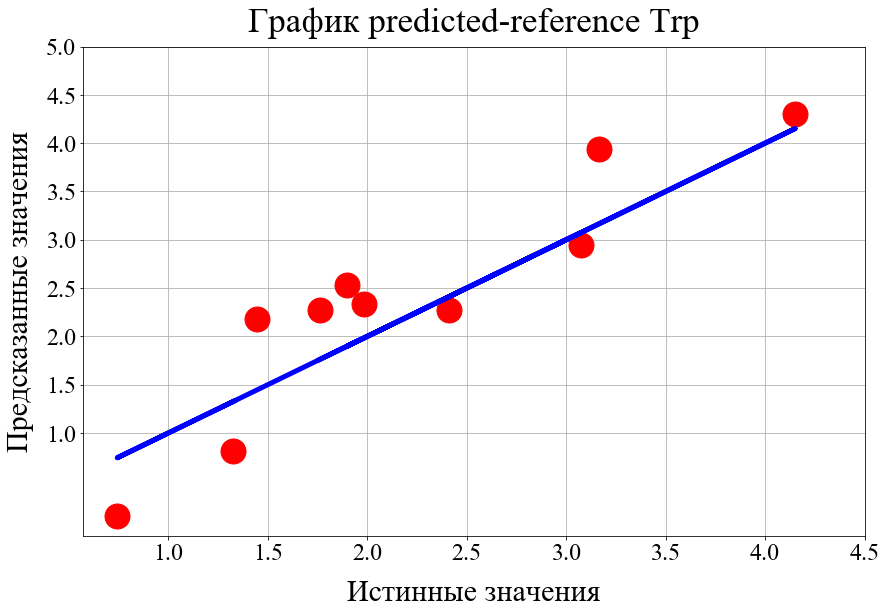

In [21]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(14,9))
plt.plot(y_test.iloc[:,2],predictors[:,2], ".",color="red",ms=50)
plt.plot(y_test.iloc[:,2],y_test.iloc[:,2],color="blue",lw=5)

plt.ylabel("Предсказанные значения" , fontsize=30,labelpad=12)
plt.grid()
plt.xlabel("Истинные значения",  fontsize=30,labelpad=15)
plt.title("График predicted-reference Trp", fontsize=35,loc="center" ,pad=15)


plt.yticks(area3y,fontsize=24)
plt.xticks(area3x,fontsize=24)
plt.savefig('График predicted-reference Trp_PLS2.jpeg', format='png', dpi=100)
plt.show();

In [19]:
area3x=np.arange(1,5,0.5)

In [20]:
area3y=np.arange(1,5.5,0.5)

In [126]:
results = pd.DataFrame(gridCought.cv_results_) 
# показываем первые 5 строк 
display(results.head()) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy,param_max_iter,param_n_components,param_scale,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026373,0.004175,0.005013,0.000635,True,10000,1,True,0.0001,"{'copy': True, 'max_iter': 10000, 'n_component...",0.570990,0.746224,0.412662,0.401942,0.470672,0.520498,0.127803,37
1,0.028881,0.006150,0.005315,0.001404,True,10000,1,True,1e-05,"{'copy': True, 'max_iter': 10000, 'n_component...",0.569772,0.736031,0.407306,0.357752,0.479381,0.510048,0.133660,38
2,0.027159,0.005388,0.005065,0.000642,True,10000,1,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.568953,0.733435,0.405650,0.344673,0.481953,0.506933,0.135912,39
3,0.029384,0.006985,0.005115,0.000665,True,10000,1,True,1e-07,"{'copy': True, 'max_iter': 10000, 'n_component...",0.568835,0.732233,0.405138,0.340428,0.482728,0.505872,0.136571,40
4,0.041224,0.006158,0.006519,0.001002,True,10000,2,True,0.0001,"{'copy': True, 'max_iter': 10000, 'n_component...",0.402958,0.832417,0.832148,0.654697,0.560354,0.656515,0.164518,13


In [127]:
scores = np.array(results.mean_test_score).reshape(100, 1) 
import mglearn 
# строим теплокарту средних значений правильности перекрестной проверки 
mglearn.tools.heatmap(scores, xlabel='n_components', xticklabels=parametrsNames['n_components'], 
                      ylabel='max_iter', yticklabels=parametrsNames['max_iter'], cmap="viridis")

ValueError: cannot reshape array of size 56 into shape (100,1)

In [128]:
from  sklearn.metrics import  mean_squared_error #среднеквадратичная ошибка
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

2.201381052561823


In [129]:
type(y_test)

pandas.core.frame.DataFrame

In [130]:
print(predictors[:,0])
print(y_test.iloc[:,0])


[48.20753427 34.0298281  53.50931346 42.80107016 38.51297221]
0     45.446791
33    35.398815
29    46.322119
12    44.546831
17    36.226228
Name: Gominy, dtype: float64


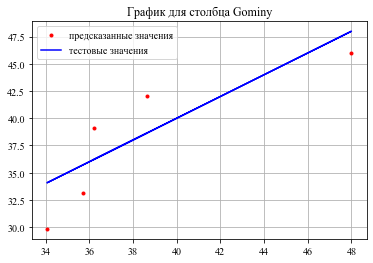

In [20]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(y_test.iloc[:,0],predictors[:,0],".",color="red",label="предсказанные значения")
plt.plot(y_test.iloc[:,0],y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();


In [132]:
cvres  =  gridCought.cv_results_ 
for mean_score,  params  in zip (cvres [ "mean_test_score" ], cvres [ "params" ] ): 
    print (np.sqrt(-mean_score),  params)


nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-07}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-07}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components